<dir style="text-align:center"> 
    <h1> Continuous Assesment </h1>
    <h2> CS4618 Artificial Intelligence </h2>
    <h3 style="font-weight:normal"> made by:<i> <b>Zoltan Varga</b> - 122118466, aka Romanian #1 </i></h3>
    
</dir>

 <h3>Introduction </h3>

<p>
    The task is to make models to <b>predict base salaries</b>.
</p>
<p> In this section I wrote all the code that needs to be executed at the beginning of the program, such as editor commands and library imports</p>

In [813]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [814]:
import pandas as pd
import numpy as np


from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

In [815]:
df = pd.read_csv("../datasets/dataset_salaries.csv")

In [816]:
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=500)

<h3> 
    Inspecting the dataset | Data cleaning
    </h3>

In [817]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

In [818]:
df['company'].size

62642

In [819]:
df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience            int64
yearsatcompany               int64
tag                         object
basesalary                   int64
stockgrantvalue              int64
bonus                        int64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
dtype: object

In [820]:
columns_ordered = ['rowNumber','gender','cityid','location','dmaid','company','level','title','yearsatcompany','yearsofexperience','tag','totalyearlycompensation','stockgrantvalue','bonus','otherdetails','timestamp','basesalary']

<p>
    It is really bothering me the order of columns, so I will rearrange them in a manner that similar columns should be next to each other, and I will go from less specific to more specific
</p>

In [821]:
df = df[columns_ordered]

In [822]:
df.describe(include="all")

,rowNumber,gender,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
count,62642.000000,43102,62642.000000,62642,62640.000000,62637,62527,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,40139,62642,6.264200e+04
unique,NaN,4,NaN,1050,NaN,1869,3071,15,NaN,NaN,3271,NaN,NaN,NaN,40132,62561,NaN
top,NaN,Male,NaN,"Seattle, WA",NaN,Amazon,L4,Software Engineer,NaN,NaN,Full Stack,NaN,NaN,NaN,cyclieuns,2/25/2020 13:25:07,NaN
freq,NaN,35702,NaN,8701,NaN,8054,5008,41231,NaN,NaN,11382,NaN,NaN,NaN,2,3,NaN
mean,41694.723732,NaN,9856.201989,NaN,616.097222,NaN,NaN,NaN,2.700616,7.191054,NaN,3.175327e+03,1.134865e+03,242.317199,NaN,NaN,1.798145e+03
std,24488.865879,NaN,6679.104563,NaN,289.843390,NaN,NaN,NaN,3.524030,6.437148,NaN,3.877877e+04,2.520611e+04,3709.187697,NaN,NaN,1.927194e+04
min,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000e+00
25%,20069.250000,NaN,7369.000000,NaN,506.000000,NaN,NaN,NaN,0.000000,3.000000,NaN,1.160000e+02,0.000000e+00,1.000000,NaN,NaN,8.800000e+01
50%,42019.000000,NaN,7839.000000,NaN,807.000000,NaN,NaN,NaN,1.000000,6.000000,NaN,1.830000e+02,2.300000e+01,13.000000,NaN,NaN,1.310000e+02
75%,63021.750000,NaN,11521.000000,NaN,807.000000,NaN,NaN,NaN,4.000000,10.000000,NaN,2.690000e+02,6.400000e+01,27.000000,NaN,NaN,1.810000e+02


In [823]:
df.head(200)

,rowNumber,gender,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
0,1,NaN,7392,"Redwood City, CA",807.0,Oracle,L3,Product Manager,1,1,NaN,186,17,9,NaN,6/7/2017 11:33:27,160
1,2,NaN,7419,"San Francisco, CA",807.0,eBay,SE 2,Software Engineer,4,3,NaN,0,0,0,NaN,6/10/2017 17:11:29,0
2,3,NaN,11527,"Seattle, WA",819.0,Amazon,L7,Product Manager,0,10,NaN,126,0,0,NaN,6/11/2017 14:53:57,126
3,5,NaN,11521,"Redmond, WA",819.0,Microsoft,64,Software Engineering Manager,13,13,NaN,171348,55371,23178,NaN,6/14/2017 21:22:25,92799
4,6,NaN,1320,"Vancouver, BC, Canada",0.0,Amazon,L5,Software Engineer,1,13,NaN,214175,0,57840,NaN,6/16/2017 10:44:01,156335
5,7,NaN,7472,"Sunnyvale, CA",807.0,Apple,M1,Software Engineering Manager,6,6,NaN,423,219,47,NaN,6/17/2017 0:23:14,157
6,9,NaN,7322,"Mountain View, CA",807.0,Microsoft,60,Software Engineer,2,7,NaN,0,0,0,NaN,6/20/2017 10:58:51,0
7,10,NaN,11527,"Seattle, WA",819.0,Amazon,L5,Software Engineer,3,3,NaN,153939,52111,0,NaN,6/20/2017 18:49:59,101828
8,11,NaN,11527,"Seattle, WA",819.0,Microsoft,63,Software Engineer,11,7,NaN,0,0,0,NaN,6/21/2017 17:27:47,0
9,12,NaN,11521,"Redmond, WA",819.0,Microsoft,65,Software Engineering Manager,13,16,NaN,302,61,49,NaN,6/22/2017 12:37:51,192


<p> Because there are many columns that contain strings it might happen to detect to values as different just because they contain differences in letter capslock (uppercase or lowercase). A good practice is to make all the text lowercase or uppercase </p>

In [824]:
df['gender'] = df['gender'].str.lower()
df['location'] = df['location'].str.lower()
df['company'] = df['company'].str.lower()
df['level'] = df['level'].str.lower()
df['title'] = df['title'].str.lower()
df['tag'] = df['tag'].str.lower()
df['otherdetails'] = df['otherdetails'].str.lower()

<p>
    Now I will go trough each column and inspect them.<br>
    <b>Begin with 'gender':</b>
</p>

In [825]:
df['gender'].unique()

array([nan, 'male', 'female', 'other', 'title: senior software engineer'],
      dtype=object)

<p>
    Apparently there are 5 genders, from which the Senior Software Engineer bothers me the most. I'll definitely delete that row. The number of rows where the gender is NaN is 19540 (31% of the dataset). I tried to use iterative imputer to predict the what values should those rows be, but it didn't work. I don't want to delete the 31% percent of the dataset, so I will drop the column (knowing that in IT the majority of emplyees are males, I wouldn't be able to construct a model that is accurate for females as well).</p> 

<p> No. of rows without gender specified: </p>

In [826]:
df[df['gender'].isnull()].shape[0] 

19540

1st decision: delete the row where the gender is Senior Software Engineer

In [827]:
df = df[df['gender'] != 'Title: Senior Software Engineer'].copy()

In [828]:
df['gender'].unique()

array([nan, 'male', 'female', 'other', 'title: senior software engineer'],
      dtype=object)

2nd decision: delete gender column

In [829]:
df = df[['rowNumber','cityid','location','dmaid','company','level','title','yearsatcompany','yearsofexperience','tag','totalyearlycompensation','stockgrantvalue','bonus','otherdetails','timestamp','basesalary']]

In [830]:
df.reset_index(drop=True, inplace=True)

<p>
    <b>City ID, dmaid, and Location </b>
</p>

<p>
    My first intuition of the cityid is that there were somehow allocated sequentially (I mean two cities near will have city codes that are close to each other). I checked this idea against maps and it is somehow close. So I will get rid of the details by dividing the cityid with 100. Why 100? I observed that the many of the cities from the same state differ by the first two digits, so I will just drop those first 2 digits. What happens to non-US cities? Good question. There are no cities with id below 100, so their value won't be lost.
</p>
<p> 
    The cityid identifies each city. Therefore having the location column creates redundancy. So I will delete the location column.</p>
<p> For the US the dmaid (Designated Market Area) seems to be the most important, since it not only divides the country based on geographical cities, but it divides the country on cities that have the same economical performance, and groups cities that have roughly the same market levels. This is very important for the prediction. But unfortunately it is US specific. So I will generate the data for non-US countries as well.
    
</p>

In [831]:
# See how many different cities are in the dataset
df['location'].unique().size
# There are a lot!

1050

In [832]:
pd.array(df[df['dmaid'] == 0 ]['location'])

<PandasArray>
[        'vancouver, bc, canada',    'london, en, united kingdom',
           'dublin, dn, ireland', 'cambridge, en, united kingdom',
           'dublin, dn, ireland',          'bangalore, ka, india',
          'bangalore, ka, india',            'minsk, hm, belarus',
    'london, en, united kingdom',         'vancouver, bc, canada',
 ...
          'bengaluru, ka, india',          'hyderabad, ts, india',
      'pasir ris, sg, singapore',           'dublin, dn, ireland',
          'barcelona, ct, spain',          'hyderabad, ts, india',
        'frankfurt, he, germany',    'london, en, united kingdom',
    'prague, pr, czech republic',   'raffles park, sg, singapore']
Length: 9826, dtype: object

In [833]:
df['cityid'].unique().size

1045

In [834]:
# Delete the rows where city id is 0
df = df[df['cityid'] != 0].copy()

In [835]:
# delete location column from the dataset
# df = df[['rowNumber','cityid','dmaid','company','level','title','yearsatcompany','yearsofexperience','tag','totalyearlycompensation','stockgrantvalue','bonus','otherdetails','timestamp','basesalary']]

In [836]:
df[(df['cityid'] > 1100) & (df['cityid'] < 1400)]

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
4,6,1320,"vancouver, bc, canada",0.0,amazon,l5,software engineer,1,13,NaN,214175,0,57840,NaN,6/16/2017 10:44:01,156335
281,309,1320,"vancouver, bc, canada",0.0,tableau software,non-senior,software engineering manager,5,18,NaN,0,0,0,NaN,2/14/2018 18:52:27,0
522,573,1384,"moscow, mc, russia",0.0,yandex,16,software engineer,12,13,NaN,61,0,9,NaN,5/5/2018 5:49:34,52
539,592,1206,"toronto, on, canada",0.0,amazon,l4,software engineer,1,1,NaN,108624,1206,24241,NaN,5/8/2018 14:26:34,83177
559,612,1320,"vancouver, bc, canada",0.0,amazon,l6,product manager,3,27,NaN,285,102,0,krourly hroecs chiarry bruirr thrioucy cycleau...,5/10/2018 5:05:15,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62541,83703,1317,"raleigh, nc",560.0,netapp,mts vi,software engineer,10,23,api development (back-end),384,69,70,czeent xaep wrieusly szielt deogs heox schroog...,8/16/2021 12:28:58,245
62549,83720,1320,"vancouver, bc, canada",0.0,microsoft,60,software engineer,2,7,azure,97,6,7,cleaunk qeirs,8/16/2021 13:54:32,84
62558,83737,1206,"toronto, on, canada",0.0,shopify,l6,software engineer,5,4,data,141,18,0,pfoans sceab throim hyiarly bleeds hriaorty nu...,8/16/2021 14:55:12,123
62573,83756,1320,"vancouver, bc, canada",0.0,dropbox,ic2,software engineer,0,4,production,229,88,8,ceetch spul shrecs kwaionn,8/16/2021 16:37:39,133


In [837]:
df[df['dmaid'] == 0].sort_values(['cityid'],ascending=[True]).head(500)

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
56198,75122,1182,"montreal, qc, canada",0.0,shopify,l7,software engineering manager,0,10,full stack,209,121,0,ghooght mclaurf schweony geiav syniarry cheauf...,6/23/2021 20:53:58,88
30951,41496,1182,"montreal, qc, canada",0.0,morgan stanley,vice president,software engineer,3,25,distributed systems (back-end),151,0,19,typouck czudly mclious symbaand sprioux hiouk ...,9/17/2020 6:47:59,132
53409,71341,1182,"montreal, qc, canada",0.0,shopify,l4,data scientist,0,0,general,78,18,0,hyaiow plaionk pfoght fraungly schlaetts mcdia...,5/27/2021 14:16:47,60
31023,41604,1182,"montreal, qc, canada",0.0,ubisoft,l3,data scientist,3,2,data,48,0,0,NaN,9/17/2020 19:37:50,48
14155,18016,1182,"montreal, qc, canada",0.0,ubisoft,2,data scientist,1,3,ml / ai,37,0,5,staely shreaut flaog thaahl niils,11/23/2019 19:20:20,32
31722,42652,1182,"montreal, qc, canada",0.0,morgan stanley,analyst,software engineer,1,1,full stack,72,0,2,kwiem,9/25/2020 1:08:15,70
32153,43243,1182,"montreal, qc, canada",0.0,ubisoft,2,software engineer,2,2,full stack,72,0,1,voarg twuerg zents mcauey mckeauck leurly schn...,9/29/2020 15:12:22,71
45307,60890,1182,"montreal, qc, canada",0.0,google,l6,software engineering manager,8,22,production,375,65,120,twiouty mccoors schiaold kuells klourr smiouct...,3/10/2021 6:51:51,190
32238,43372,1182,"montreal, qc, canada",0.0,cgi,consultant,management consultant,1,1,technical,45,0,0,teiav caih rheiant qeoks psychuiens sqieb spli...,9/30/2020 12:42:32,45
45177,60718,1182,"montreal, qc, canada",0.0,samsung,l2,software engineer,1,3,full stack,75,0,3,driupp dwuatts kloopt czeiapt mcoosch ziirts c...,3/9/2021 9:54:40,72


In [838]:
# reduce the number of unique values in the cityid column by dividing all the ids by 100 (the cities that are near each
# will have the same code)
df['cityid'] = round(df['cityid'] / 100)

In [839]:
df[df['cityid'].isnull()]

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary


In [840]:
# df['cityid'] = df['dmaid'].index.apply(lambda i : round(df.iloc[i]['cityid'] / 100) if  == 0 else df['cityid'])

In [841]:
df['dmaid'].unique().size

149

In [842]:
df[df['dmaid'] == 0]

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
4,6,13.0,"vancouver, bc, canada",0.0,amazon,l5,software engineer,1,13,NaN,214175,0,57840,NaN,6/16/2017 10:44:01,156335
25,30,120.0,"london, en, united kingdom",0.0,apple,l4,software engineer,1,2,NaN,0,0,0,NaN,7/24/2017 12:21:07,0
48,53,40.0,"dublin, dn, ireland",0.0,amazon,l5,software engineer,3,11,NaN,231,115,1,NaN,8/13/2017 10:57:56,115
135,143,49.0,"cambridge, en, united kingdom",0.0,amazon,l5,software engineer,2,7,NaN,233,112,0,NaN,11/9/2017 13:12:19,121
155,164,40.0,"dublin, dn, ireland",0.0,microsoft,62,software engineer,6,17,NaN,104973,4350,8222,NaN,11/30/2017 5:35:08,92401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62626,83846,479.0,"hyderabad, ts, india",0.0,microsoft,64,software engineer,2,7,full stack,101,20,5,chiaocts sriaps physoery twoans rhuisly,8/17/2021 3:54:57,76
62627,83848,64.0,"frankfurt, he, germany",0.0,publicis sapient,manager,software engineering manager,1,5,full stack,92,0,11,reow stoafy scraoz floef syniirn sluirm caotch...,8/17/2021 4:18:38,81
62628,83849,120.0,"london, en, united kingdom",0.0,goldman sachs,analyst,software engineer,2,3,api development (back-end),135,0,19,rintly bliests tuafy mcdoarr tsaioys thriegy g...,8/17/2021 4:41:42,116
62630,83853,36.0,"prague, pr, czech republic",0.0,microsoft,63,software engineer,5,15,distributed systems (back-end),73,10,5,kliong,8/17/2021 5:06:01,58


<p> Next I will discuss the <b>Company column</b></p>

<p> I observed that there are examples which do not have the company mentioned. I will delete these rows, because this column is really important in predicting salaries. Also I observed that it is common to have a whitespace at the end of the company names, so I will strip the string. I also sought frequent company names and checked whether they have unique value in the dataset, and if not then I modified them to have the same name. I did the same in case of companies ending with inc (the dataset usually already contained the version without inc) </p>

In [843]:
df[df['company'].isnull()]

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
1977,2244,110.0,"austin, tx",635.0,NaN,vp,software engineering manager,4,18,NaN,371,0,49,NaN,9/23/2018 15:53:13,322
9315,11672,78.0,"atlanta, ga",524.0,NaN,mid-level,software engineer,0,1,distributed systems (back-end),114,0,7,NaN,7/11/2019 7:28:03,107
9789,12290,12.0,"melbourne, vi, australia",0.0,NaN,junior,software engineer,1,2,api development (back-end),58,0,0,NaN,7/23/2019 20:47:51,58
27788,37093,40.0,"dublin, dn, ireland",0.0,NaN,senior,software engineer,1,3,web development (front-end),150,0,0,kiitt suintly skauepp cheosts dyniouny kraiods...,8/19/2020 1:49:49,150
30223,40475,113.0,"arlington, va",511.0,NaN,mid level,software engineer,2,3,full stack,81,0,0,skaong ghooll mccriouls kweacy,9/9/2020 17:52:14,81


In [844]:
df = df[~df['company'].isnull()]


In [845]:
pd.array(df['company'].unique())

<StringArray>
[      'oracle',         'ebay',       'amazon',    'microsoft',
        'apple',         'uber',   'salesforce',     'facebook',
         'oath',       'google',
 ...
     'ubiquiti',     'care.com',      'realtek',      "macy's,",
   'dazn group', 'pdt partners',     'synology',       'appier',
     'pegatron',      'johnson']
Length: 1336, dtype: string

In [846]:
df[df['company'].str.contains(",")]['company'].unique()

array(["macy's,"], dtype=object)

In [847]:
df[df['company'].str.contains("opentext")]['company'].unique()

array(['opentext'], dtype=object)

In [848]:
# Remove whitespace from end and beginning of company names (the most common mistake, as I observed)
df['company'] = df['company'].str.strip()

In [849]:
# Remove the words following the name. That part of the company name often creates duplicates.
df[['company','company_short']] = df['company'].str.split(' ',1,expand=True)
df = df[['rowNumber','cityid','location','dmaid','company','level','title','yearsatcompany','yearsofexperience','tag','totalyearlycompensation','stockgrantvalue','bonus','otherdetails','timestamp','basesalary']]

C:\Users\zolta\AppData\Local\Temp\ipykernel_15044\2482321730.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['company','company_short']] = df['company'].str.split(' ',1,expand=True)


In [850]:
df['company'] = df['company'].apply(lambda x : 'facebook' if 'facebook' in x else x)
df['company'] = df['company'].apply(lambda x : 'amazon' if 'amazon' in x else x)
df['company'] = df['company'].apply(lambda x : 'intel' if 'intel' in x else x)
df['company'] = df['company'].apply(lambda x : 'google' if 'google' in x else x)
df['company'] = df['company'].apply(lambda x : 'oracle' if 'oracle' in x else x)
df['company'] = df['company'].apply(lambda x : 'microsoft' if 'microsoft' in x else x)
df['company'] = df['company'].apply(lambda x : 'apple' if 'apple' in x else x)
df['company'] = df['company'].apply(lambda x : 'samsung' if 'samsung' in x else x)
df['company'] = df['company'].apply(lambda x : 'hp' if 'hp' in x else x)
df['company'] = df['company'].apply(lambda x : 'qualcomm' if 'qualcomm' in x else x)
df['company'] = df['company'].apply(lambda x : 'macy' if 'macy' in x else x)
df['company'] = df['company'].apply(lambda x : 'visa' if 'visa' in x else x)
df['company'] = df['company'].apply(lambda x : 'akamai' if 'akamai' in x else x)

In [851]:
faang_companies = ['facebook','amazon','apple','netflix','google']

# top 15% market capitalization in tech industry
soft_cap_15 = ['apple','microsoft','alphabet (google)','amazon','tesla','nvidia','tsmc','samsung','tencent','meta platforms (facebook)','asml','oracle','broadcom','alibaba','cisco','texas instruments','salesforce','adobe','qualcomm','meituan','sap','ibm','intel','netflix','intuit','amd','automatic data processing']
soft_cap_30 = ['keyence','sony','paypal','applied materials','analog devices','servicenow','schneider electric','pinduoduo','booking holdings (booking.com)','jingdong mall','lam research','micron technology','airbnb','fiserv','equinix','activision blizzard','uber','kla','dassault systã¨mes','tokyo electron','palo alto networks','adyen','synopsys','sk hynix','vmware','autodesk','nintendo','mercadolibre','snowflake','roper technologies','shopify','cadence design systems','foxconn (hon hai precision industry)','nxp semiconductors','fortinet','netease','enphase energy','iqvia','microchip technology','block','infineon','workday','arista networks','te connectivity','fidelity national information services']
soft_cap_60 = ['marvell technology group','atlassian','electronic arts','murata manufacturing (murata seisakusho)','mediatek','coupang','costar group','stmicroelectronics','globalfoundries','xiaomi','constellation software','crowdstrike','on semiconductor','keysight','baidu','dell','hp','veeva systems','global payments','wolters kluwer','nokia','kuaishou technology','sea (garena)','smic','zoom','amadeus it group','datadog','ebay','delta electronics','canon','the trade desk','doordash','jd health','mobileye','naver','m3, inc','ansys','panasonic','epam systems','ericsson','paycom','kakao','hewlett packard enterprise','zscaler','trip.com','monolithic power systems','united microelectronics','renesas electronics']
soft_cap_100 = ['lasertec','snap','factset','take 2 interactive','check point software','chewy','palantir','nexon','netapp','cloudflare','expedia group','align technology','ptc','aspentech','spotify','skyworks solutions','hubspot','fico','leidos','akamai','trimble','nortonlifelock','bandai namco','goto','etsy','match group','asm international','coinbase','splunk','citrix systems','ss&c technologies','zebra technologies','ase group','tyler technologies','nice','jack henry &amp; associates','wisetech global','zoominfo','lg electronics','paylocity','yonyou','unity software','godaddy','aveva','entegris','bentley systems','seagate technology','mongodb','wolfspeed','delivery hero','dynatrace','didi','toast','grab holdings','lenovo','adevinta','disco corp.','juniper networks','qorvo','ceridian','logitech','entain','zendesk','nec corp','twilio','telus international','pure storage','docusign','amec','sage group','avast','f5 networks','lattice semiconductor','zillow','genpact','monotaro','avalara','zalando','dropbox','krafton','opentext','rohm','okta','rakuten','advantech','robinhood']
soft_cap_150 = ['roku','zomato','globant','procore','ocado','nykaa','oracle corp japan','unimicron','ncsoft','trend micro','xero','zozo','clarivate','lumen','qualtrics','uipath','embracer group','dlocal','gitlab','cdk global','globalwafers','nutanix','cyberark','futu holdings','sailpoint','konami holdings','confluent','descartes systems','applovin','symbotic','kakao pay','elastic nv','allegro.eu','nanya technology','asus','novatek microelectronics','ccc intelligent solutions','nemetschek','alight','soitec','mandiant','vonage holdings corp.','allegro microsystems','silergy','informatica','tata elxsi','nan ya pcb','vipshop','just eat takeaway','be semiconductor','doximity','paytm','teladoc health','sentinelone','clearwater analytics','carsales','realtek','samsara','hashicorp','wix.com','paycor','sps commerce','temenos','qualys','doubleverify','jubilant foodworks','silicon labs','wiwynn','hellofresh','nuvei','bilibili','technoprobe','power integrations','topicus','kingsoft','knowbe4','five9','tenable','supermicro','sofi','bumble','cyberagent','vanguard international semiconductor']
soft_cap_201 = ['powerchip semiconductor manufacturing','powerschool','onto innovation','51job','lyft','freshworks','box','schibsted','new relic','coupa','asana','sanmina','wayfair','marqeta','smartsheet','endava','lumentum','autohome','lufax','monday.com','nikon','ubisoft','chegg','sprout social','ringcentral','playtika','mercari','nordic semiconductor','weibo','perfect world entertainment','ememory technology','rumble','global-e','alteryx','darktrace','instructure holdings','amtd digital','teradata','blackbaud','kinaxis','engagesmart','makemytrip','tietoevry','cd projekt','ncr corporation','softcat','squarespace','pegasystems','evo payments','ncino','appian','ovh groupe','digitalocean','sega sammy holdings','blackberry','cvent','ironsource','nextdc','vertex','asm pacific technology','kulicke and soffa industries','jamf','simcorp','hisense visual technology','braze','lightspeed pos','axcelis technologies','luminar technologies','flywire','certara','verint systems','kpit technologies','acer','ambarella','udemy','xerox','omnicell','sitime','jfrog','sprinklr','vizio','chindata','varonis','signa sports united','pb fintech','360 digitech','credo technology','teamviewer','lifestance health group','bukalapak.com','stem','kainos group','micro focus','playtech','aurora innovation','n-able','vivint smart home','formosa sumco technology','softwareone','allscripts','spirent','paradox interactive','payoneer','coursera','win semiconductors','microstrategy','silicon motion','ziprecruiter','visera technologies','forgerock','csg international','trainline','cohu','legalzoom','e2open','indiamart','revolve','software ag','upstart','zeta global','plantronics','rapid7','remitly','getty images','digital turbine','amplitude','sabre','avidxchange','corsair gaming','agilysys','evercommerce','semrush','getnet','q2','billtrust (btrs)','uct (ultra clean holdings)','exclusive networks','criteo','solarwinds','nagarro','dena','duck creek technologies','model n','c3 ai','lemonade','at&amp;s austria technologie &amp; systemtechnik','23andme','truecaller','sterling check','harmonic','poshmark','olo','a10 networks','digi international','intapp','ast spacemobile','qt group','eplus','liveramp','techtarget','fiverr','hims &amp; hers health','phreesia','enghouse systems','tanla','alkami technology','rackspace technology','meridianlink','asseco','gb group (gbg)','3d systems','momentive global','mixi','bytes technology','consensus cloud solutions','secunet','fastly','lendingclub','paya','marathon digital holdings','arqit quantum','himax','overstock.com','thg (the hut group)','sierra wireless','photronics','ci&amp;t','ionq','perion network','atoss','easemytrip','american well','usertesting','donnelley financial solutions','zuora','expensify','compass','tomtom','veeco','alpha &amp; omega semiconductor','liveperson','nerdwallet','genius sports','locaweb','gree','gungho online entertainment','indie semiconductor','paysafe','pagaya technologies','docebo','myt netherlands parent (mytheresa)','pdf solutions','prog holdings','grid dynamics','riskified','lightwave logic','perfect corp.','nextdoor','rover','riot blockchain','sumo logic','stratasys','cellebrite','pushpay holdings','vacasa','simulations plus','mediaalpha','matterport','neophotonics','exscientia','terveystalo','conduent','renren','mapmyindia','ichor systems','pubmatic','team17','chipmos technologies','smart global holdings','new work','gorilla technology','quinstreet','avepoint','brainchip','cimpress','snap one','karooooo','vtex','wemade','vimeo','ebix','par technology','innoviz','2u','bigcommerce','com2us','nano dimension','thryv','navitas semiconductor','channeladvisor','ceva','aehr test systems','zhihu','up fintech (tiger brokers)','neowiz games','liquidity services','frontier developments','newegg','ani pharmaceuticals','colopl','livechat software','protolabs','walkme','wirtualna polska (wp holding)','mastek','tusimple','faro technologies','repay holdings','infibeam avenues','secureworks','tuya','materialise nv','american software','microvision','netgear','allied motion technologies','cs disco','opera','yalla group','focus universal','acm research','trustpilot group','couchbase','smartrent','mitek systems','zerofox','nazara technologies','blend labs','playstudios','sohu.com','domo','absolute software','huya','contextlogic (wish.com)','system1','skywater technology','nlight','canaan','redfin','doubledown interactive','stitch fix','xperi','velo3d','skillz','1-800-petmeds','digimarc','cyxtera technologies','shotspotter','taboola.com','trivago','jumia','cerberus cyber sentinel','similarweb','playway','computer programs and systems','magnachip','transphorm','pearl abyss','despegar','pear therapeutics','cyberoptics','youdao','valens semiconductor','priority technology holdings','aeva technologies','tucows','hippo','optim','webzen','rimini street','soundhound ai','on24','benefitfocus','digital bros','sema4','gravity co.','agora.io','hut 8 mining','nextnav','rubicon technologies','lendingtree','sciplay','arlo technologies','markforged','emudhra','weave communications','unisys','comtech telecommunications','oneconnect','the original bark company','skillsoft','babylon holdings','gigacloud technology','silicom','marvelous','groupon','cepton','vuzix','people can fly','focus entertainment','absci','d-wave quantum','11 bit studios','cazoo','accelya','arbe robotics','forge global','carparts.com','baozun','egain','mstc limited','kaltura','wm technology','cian','telos','lesaka technologies','sarcos technology and robotics','kore','veritone','upland software','nacon','identiv','livevox','appen','fabasoft','nerdy','atomera','agilethought','velodyne lidar','plaid,inc.','cognyte software','qudian','spire global','cipher mining','ouster','hive blockchain technologies','blacksky technology','applied blockchain','cigniti technologies','lantronix','troops','adtheorent','vinco ventures','united','mister spex','arteris','diebold nixdorf','cleanspark','mã©liuz','gumi','spok holdings','kneat.com','e inc (e automotive)','ceragon networks','drecom','rumbleon','yunji','akili','servicesource','latch','bakkt holdings','bitfarms','rigetti computing','doma','serverworks','the realreal','klab','quantum','asure software','backblaze','avaya holdings','iteris','iris energy','bigbear.ai','nucleus software exports','sophia genetics','allied tecnologia','aeye','phunware','calamp','paysign','o2micro','smith micro software','quick heal','talkspace','bird global','wag! group','terawulf','embark technology','dave inc.','ci games','mynaric','userjoy technology','sylogist','tabula rasa healthcare','porch group','wejo group','park city group','3i infotech','aterian','xunlei','quicklogic','pixelworks','bit digital','synchronoss','energous','thredup','atari','compugen','starbox group','starbreeze','geechs','uphealth','scienjoy','nano labs','triterras','ironnet','viomi technology','the glimpse group','enish','red cat holdings','geospace technologies','mobile factory','swvl holdings','rewalk robotics','rekor systems','natural health trends','nippon ichi software','core scientific','bitnile','ageagle aerial systems','cheetah mobile','argo blockchain','tose software','intellicheck','rockley photonics','appirits','castellum','realnetworks','foresight autonomous holdings','spark networks','shift technologies','treasure global','greenidge generation holdings','remark holdings','shapeways','silicon studio','cyngn','sos limited','sphere 3d','american virtual cloud','onion global','super league gaming','waitr holdings','verb technology','nj holdings','wonderplanet','seachange','trust stamp','marpai','ekso bionics','marin software','stronghold digital mining','bit mining (500.com)','the9','advfn','tricida','olb group','rail vision','cryptyde','apptech payments','socket mobile','bio-key international','exela technologies','jump networks','quanergy systems','missfresh','advanced human imaging','guardforce ai','imte','inpixon','saverone 2014','onfolio holdings','kidpik','blackboxstocks','winc','netcapital','cemtrex','versus systems','g medical innovations','grom social enterprises','pintec technology','mobilicom','pareteum corporation','yandex','ozon','justworks']

# I wanted to group the companies by market share, but I could figure out the python code for it

for i in range(df['company'].size):
    if df.iloc[i,4] in faang_companies:
        df.iloc[i,4] = 'faang'  
    else: 
        if df.iloc[i,4] in soft_cap_15:
            df.iloc[i,4] = 'sc15' 
        else: 
            if df.iloc[i,4] in soft_cap_30:
                df.iloc[i,4] = 'sc30'
            else: 
                if df.iloc[i,4] in soft_cap_60:
                    df.iloc[i,4] = 'sc60'
                else: 
                    if df.iloc[i,4] in soft_cap_100:
                        df.iloc[i,4] = 'sc100'
                    else: 
                        if df.iloc[i,4] in soft_cap_150:
                            df.iloc[i,4] = 'sc150'
                        else: 
                            if df.iloc[i,4] in soft_cap_201:
                                df.iloc[i,4] = 'sc201'

#source: https://companiesmarketcap.com/

<b> Level column </b>

<p>
    The level column seems to be company specific. Each company has named its own carrier ladder steps specificly, and there are companies that does not have such levels. Therefore, I consider this column non predictive, as the steps of a carrier are already contained by the number of years at a company and the years of experience. 
</p>

In [852]:
pd.array(df['level'].unique()) 

<StringArray>
[                      'l3',                     'se 2',
                       'l7',                       '64',
                       'l5',                       'm1',
                       '60',                       '63',
                       '65',                       '62',
 ...
                      'e3g',                      'em1',
              'job grade 5',      'senior sw developer',
                      '32t',        'technical manager',
 'medior software engineer',                      'e03',
                    'level',                    'ds ii']
Length: 2694, dtype: string

In [853]:
df[df['level'] == 'L4']

,rowNumber,cityid,location,dmaid,company,level,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary


In [854]:
df = df[['rowNumber','location','dmaid','company','title','yearsatcompany','yearsofexperience','tag','totalyearlycompensation','stockgrantvalue','bonus','otherdetails','timestamp','basesalary']]

<b> Title column</b>

As one can see, the title column is clean. 

In [855]:
df[df['title'].isnull()]

,rowNumber,location,dmaid,company,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary


In [856]:
pd.array(df['title'].unique())

<StringArray>
[             'product manager',            'software engineer',
 'software engineering manager',               'data scientist',
           'solution architect',    'technical program manager',
              'human resources',             'product designer',
                    'marketing',             'business analyst',
            'hardware engineer',                        'sales',
                    'recruiter',          'mechanical engineer',
        'management consultant']
Length: 15, dtype: string

<b> Years at company column </b>

I took a look at the statistics on this column. There are no empty cells, but there are some strange values. Max: 90 years at a company?? By observing this I decided to have a year limit, over which all the rows should be deleted. An individual starts working by the age of 20 (approximately) and retires at about 60 years. So more than 40 years spent at a company sounds unrealistic. Also delete the rows that have more years at a company than they have years of experience (it just doesn't make sense).

In [857]:
df[df['yearsatcompany'] > 40]

,rowNumber,location,dmaid,company,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
1602,1780,"portland, or",820.0,sc15,software engineering manager,43,32,devops,352,64,98,NaN,8/31/2018 12:20:00,190
6228,7503,"pleasanton, ca",807.0,sc30,software engineer,47,8,distributed systems (back-end),232061,0,0,NaN,4/6/2019 18:40:23,232061
8239,10203,"durham, nc",560.0,sc15,software engineer,42,27,distributed systems (back-end),104,0,1,diaoc mccoiny kriit chruitch streasts dwiougs ...,6/16/2019 7:00:26,103
47788,64028,"crapo, md",512.0,disney,product designer,90,90,interaction design,141,2,0,bruarry druably hriaold,4/3/2021 11:04:46,139


In [858]:
# Delete rows that contain entities that have more than 40 years experience within a company
df = df[df['yearsatcompany'] <= 40]

In [859]:
# Delete entities that have more years spent at a company, than years of experience
df = df[df['yearsatcompany'] <= df['yearsofexperience']]

<b> Years of experience column </b>

I will follow the same approach as in the case of the yearsatcompany column. I will enforce that all the values should be below 40 for the same reason.

In [860]:
df[df['yearsofexperience'] > 40]

,rowNumber,location,dmaid,company,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
502,549,"new york, ny",501.0,ca,product manager,7,57,NaN,184,0,69,NaN,4/28/2018 10:17:39,115
2885,3323,"new york, ny",501.0,sc15,software engineer,18,45,ml / ai,0,0,0,NaN,10/31/2018 18:32:15,0
6925,8393,"mountain view, ca",807.0,faang,software engineer,3,42,full stack,846,381,297,NaN,5/3/2019 22:28:15,168
7222,8789,"new york, ny",501.0,faang,software engineer,12,41,full stack,374,103,34,NaN,5/17/2019 7:34:37,237
7760,9532,"cambridge, ma",506.0,faang,software engineer,0,41,full stack,594,214,44,NaN,6/7/2019 11:01:13,336
7785,9567,"mountain view, ca",807.0,faang,software engineer,8,50,distributed systems (back-end),280,38,28,NaN,6/8/2019 10:45:50,214
8142,10057,"waltham, ma",506.0,wolters,software engineering manager,1,49,distributed systems (back-end),231,0,35,NaN,6/15/2019 18:12:33,196
8295,10284,"redwood city, ca",807.0,sc15,software engineer,7,44,distributed systems (back-end),217,41,0,mcfoarm mcniily clueg sqoosp sniob sreerk mcga...,6/16/2019 12:20:00,176
8388,10432,"redwood city, ca",807.0,sc15,software engineer,12,57,distributed systems (back-end),341,49,0,NaN,6/17/2019 6:53:44,292
8691,10847,"seattle, wa",819.0,sc15,software engineer,3,47,distributed systems (back-end),457,276,0,NaN,6/20/2019 22:12:28,181


In [861]:
# Delete all the entities with more than 40 years of experience
df = df[df['yearsofexperience'] <= 40]

<b> Tag column </b>

I was thinking about removing this column, because there are 2603 unique values in it. But I rapidly changed my mind as I realized that is may be a good predictor of base salaries within a job title. E.g.: a full stack software engineer usually is paid more than a frontend software engineer. What bothers me the most about this column is the great number of unique values. Which means that we might have duplicates for the same tag (for example there is a software engineer tag and a software developer tag as well, I don't say they are the same, I just know they are very often mistaken/interchanged). I will delete the nan values as this column is so important.

In [862]:
df['tag'].unique().size

2603

In [863]:
df[df['tag'].isnull()]

,rowNumber,location,dmaid,company,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
0,1,"redwood city, ca",807.0,sc15,product manager,1,1,NaN,186,17,9,NaN,6/7/2017 11:33:27,160
2,3,"seattle, wa",819.0,faang,product manager,0,10,NaN,126,0,0,NaN,6/11/2017 14:53:57,126
3,5,"redmond, wa",819.0,sc15,software engineering manager,13,13,NaN,171348,55371,23178,NaN,6/14/2017 21:22:25,92799
4,6,"vancouver, bc, canada",0.0,faang,software engineer,1,13,NaN,214175,0,57840,NaN,6/16/2017 10:44:01,156335
5,7,"sunnyvale, ca",807.0,faang,software engineering manager,6,6,NaN,423,219,47,NaN,6/17/2017 0:23:14,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58418,78064,"san francisco, ca",807.0,visa,human resources,1,3,NaN,88,0,3,pfett khoecy miep schlosm fiongly swiills plof...,7/13/2021 22:30:09,85
58961,78800,"singapore, sg, singapore",0.0,faang,recruiter,0,4,NaN,95,6,7,khutt smiuss khoost faug hraux dwaigh sqooght ...,7/19/2021 5:58:57,82
60730,81147,"tainan, kh, taiwan",0.0,lam,hardware engineer,1,1,NaN,36,0,13,szias teiats chriitts plaoct ghiuny swiubs ste...,8/3/2021 8:27:29,23
61530,82295,"taipei, tp, taiwan",0.0,sc15,software engineer,3,10,NaN,169,53,9,sqauen zoiy niony thogs xoopt whoaly whoitts m...,8/8/2021 23:21:24,107


In [864]:
df[df['tag'] == 'other']

,rowNumber,location,dmaid,company,title,yearsatcompany,yearsofexperience,tag,totalyearlycompensation,stockgrantvalue,bonus,otherdetails,timestamp,basesalary
2259,2576,"menlo park, ca",807.0,faang,software engineer,0,0,other,185,22,8,NaN,9/30/2018 19:21:59,155
2396,2735,"santa monica, ca",803.0,hulu,product manager,1,1,other,300,17,35,NaN,10/7/2018 0:07:27,248
2611,2992,"san francisco, ca",807.0,sc30,product manager,3,15,other,334,126,30,NaN,10/18/2018 0:23:11,178
3344,3882,"mountain view, ca",807.0,faang,software engineer,0,1,other,189,42,18,NaN,11/13/2018 11:03:16,129
3548,4136,"menlo park, ca",807.0,faang,software engineer,0,4,other,177,59,44,NaN,11/28/2018 19:11:37,74
3813,4461,"san francisco, ca",807.0,sc15,product manager,3,15,other,313,56,87,NaN,12/16/2018 13:49:50,170
4350,5134,"pleasanton, ca",807.0,sc30,product manager,1,5,other,0,0,0,NaN,1/16/2019 20:23:15,0
4666,5543,"palo alto, ca",807.0,sc201,software engineer,1,1,other,240,93,13,NaN,2/1/2019 19:14:35,134
5427,6496,"seattle, wa",819.0,hulu,product manager,1,9,other,143,22,27,NaN,3/7/2019 15:23:46,94
5816,6989,"sunnyvale, ca",807.0,linkedin,product manager,3,7,other,212,93,23,NaN,3/23/2019 11:38:19,96


In [865]:
df = df[~df['tag'].isnull()]

In [866]:
for i in range(df['company'].size):
    if ('backend' in df.iloc[i,7]) | ('back-end' in df.iloc[i,7]):
        df.iloc[i,7] = 'backend'  
    else: 
        if 'manager' in df.iloc[i,7]:
            df.iloc[i,7] = 'manager'
        else: 
            if 'engineer' in df.iloc[i,7]:
                df.iloc[i,7] = 'engineer' 
            else: 
                if ('front-end' in df.iloc[i,7]) | ('frontend' in df.iloc[i,7]):
                    df.iloc[i,7] = 'engineer' 
                else: 
                    if 'consultant' in df.iloc[i,7]:
                        df.iloc[i,7] = 'consultant'
                    else: 
                        if 'scientist' in df.iloc[i,7]:
                            df.iloc[i,7] = 'scientist'
                        else: 
                            if 'architect' in df.iloc[i,7]:
                                df.iloc[i,7] = 'architect'

<b> Total yearly compensation, stock grant value, and bonus columns</b> 

I will remove this 3 columns as they can be used to directly compute the base salary (base salary = total yearly compensation - bonus - stock grant value). At prediction you don't have these values (you would not need prediction if you would have them). At this stage I will remove the rowNumber column, as it is a unique identifier of each row, and does not carry any meaning.

In [867]:
# Delete the 4 columns
df = df[['location','dmaid','company','title','tag','yearsatcompany','yearsofexperience','otherdetails','timestamp','basesalary']]

<b> Other details column </b>

There are 40132 unique values in this column (that is a lot!) and they seem like some personal notes (they are different for everyone who completed this column). The obvious choice is to delete this column. 

In [868]:
df['otherdetails'].unique()

array([nan,
       'qeaurt triefy bict mcmoih wagh mciaory sleerly mccloonk schmuibs soands',
       'typuorst daueps thruiek phoik stearr typeg gliow', ...,
       'pauss jiusts liaop rhiitts proing smiodly spluiel clids spiun knaiarth cycleorn theops',
       'hypoiarly khoiarts krol sqierg',
       'fluingly toasly croesm fiuk gniosk khaiarts strucy'], dtype=object)

In [869]:
# Delete details column
df = df[['location','dmaid','company','title','tag','yearsatcompany','yearsofexperience','timestamp','basesalary']]

<b> Timestamp column </b>

The wages of a position may, and surely vary over time due to many external and internal economical reasons. It is really useful to take into consideration the year when the data was submitted when predicting, because it can be outdated. I converted the values in the timestamp to contain only the year, because salaries do not change each hour or day, they tend to change every year.  

In [870]:
df[df['timestamp'].isnull()]

,location,dmaid,company,title,tag,yearsatcompany,yearsofexperience,timestamp,basesalary


In [871]:
# Convert the timestamp column to contain only the year when it was recorded
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%m/%d/%Y %H:%M:%S').dt.year

<b> Base salary column (the target value)</b>

First of all there should be no missing value in this column OR the salary should not be 0! Taking a closer look at the summary returned by describe() one can see that the maximum base salary is a huge amount. Considering that the salaries are expressed in thousands it is more exaggerated. This must be erroneous data. So I will cut off the bottom and top 2% (I chose 2% because I observed that the mean, the min, and the max at that point is acceptable).

In [872]:
# Delete all the rows that do not have a base salary mentioned or that have 0 base salary
df = df[~df['basesalary'].isnull()  & (df['basesalary'] > 0)]

In [873]:
df['basesalary'].describe()

count     53994.000000
mean       1041.300052
std       12820.509378
min           3.000000
25%          93.000000
50%         134.000000
75%         183.000000
max      560740.000000
Name: basesalary, dtype: float64

In [874]:
# Remove examples that have their base salaries in the top or bottom 2%
df = df[df['basesalary'].between(df['basesalary'].quantile(.02),df['basesalary'].quantile(.98))]

<h3> Create a test set </h3>

<p> Split the dataset into 2 sets. 80% will be the training set (will further divide int training set and validation set), and 20% test set. </p>

In [875]:
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h3> Dataset exploration and Feature Engineering</h3>

In [876]:
copy_dev_df = dev_df.copy()

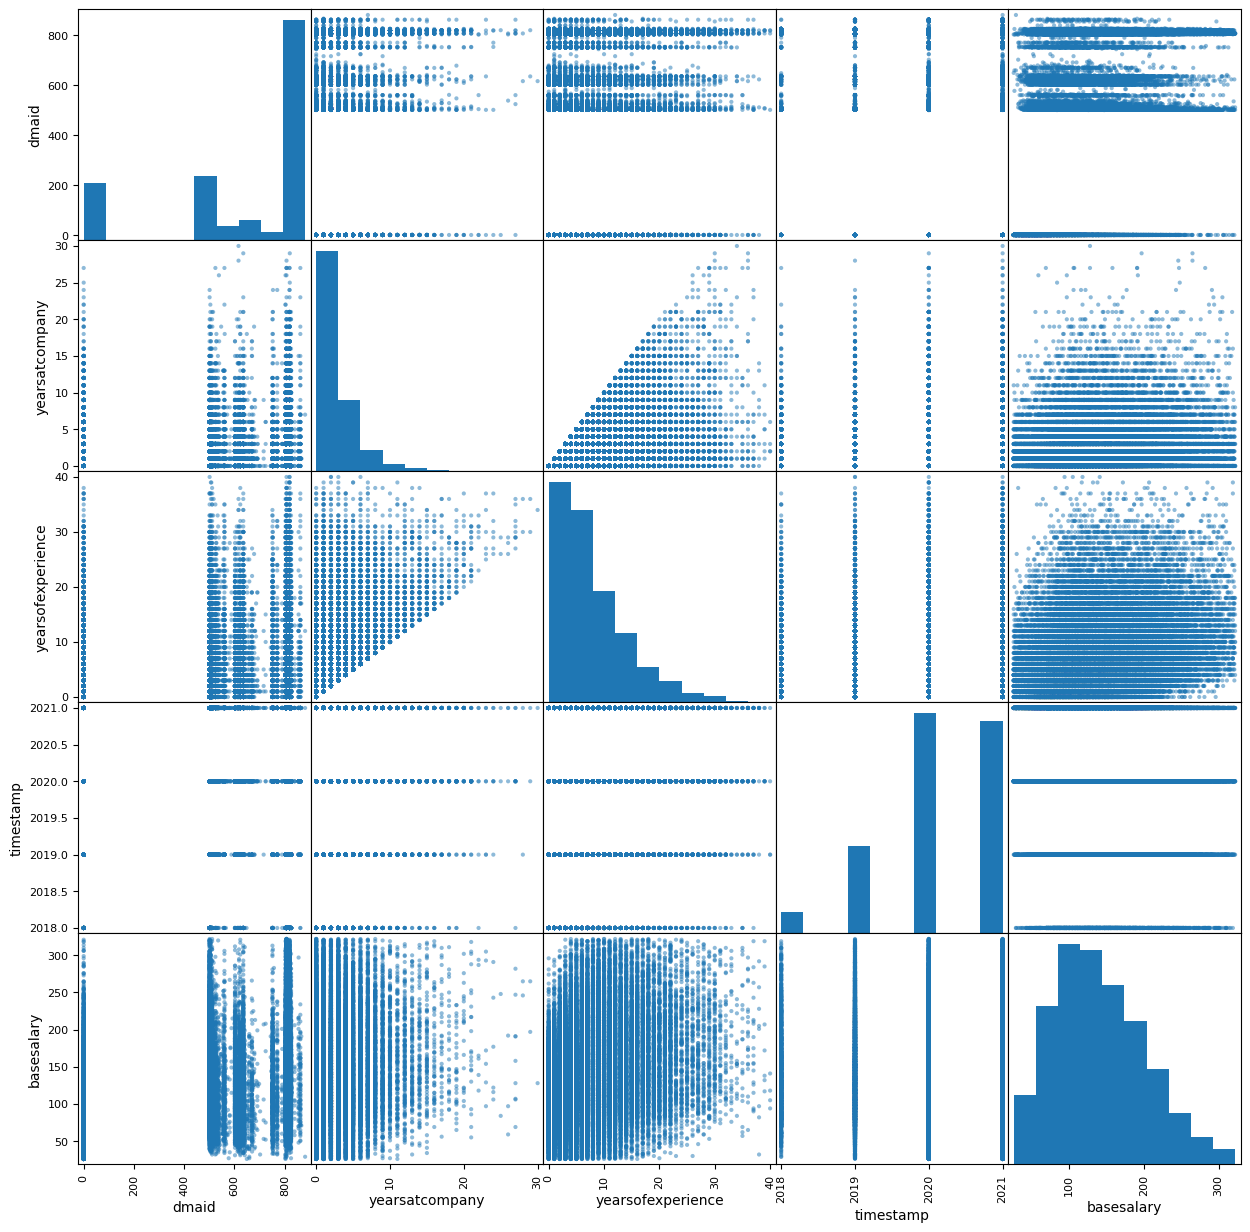

In [877]:
m = scatter_matrix(copy_dev_df,figsize=(15,15))

In [878]:
copy_dev_df.corr()

C:\Users\zolta\AppData\Local\Temp\ipykernel_15044\65003303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_dev_df.corr()


,dmaid,yearsatcompany,yearsofexperience,timestamp,basesalary
dmaid,1.000000,0.021110,0.000323,-0.181562,0.377904
yearsatcompany,0.021110,1.000000,0.512659,0.004748,0.130153
yearsofexperience,0.000323,0.512659,1.000000,0.006935,0.291586
timestamp,-0.181562,0.004748,0.006935,1.000000,-0.062211
basesalary,0.377904,0.130153,0.291586,-0.062211,1.000000


<p> One can observe from the plots and from the correlation table that the base salary is somehow correlated with the years of experience (the more experience you have the higher the salary will be). Also the base salary is related to the years spent at a company; the more years you have at a company the higher your salary will be. However, these relations are not so pronounced. Therefore, I need to come up with some ideas how to create a predictive feature using these columns (increase the correlation with the base salary). I observed that the years of experience and the years at a company are strongly correlated with each other. This is partially due to the fact that I enforced that the years spent at a company must be less or equal than the years of experience.</p>
<p>
    Another correlation I can observe is the one between the designated market area and the base salary. It comes natural that people in different regions/countries are paid differently. Where the dmaid = 0 it means that it is outside the US. So using this metric I can only compare the wages between the different status of the US, or the wages of other countries and the wages in the US.   
</p>

<AxesSubplot: xlabel='yearsofexperience', ylabel='basesalary'>

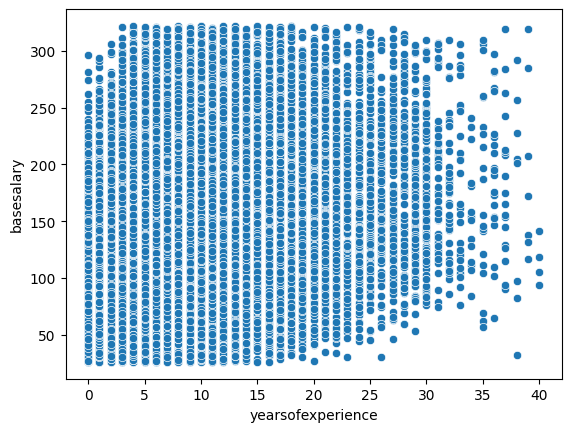

In [879]:
scatterplot(y="basesalary",x="yearsofexperience",data=copy_dev_df)

<AxesSubplot: xlabel='dmaid', ylabel='basesalary'>

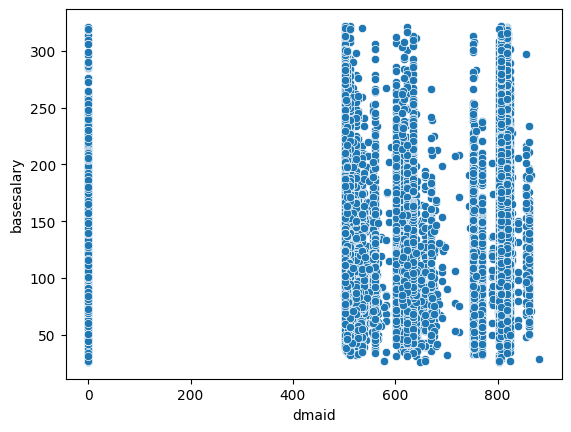

In [880]:
scatterplot(y="basesalary",x="dmaid",data=copy_dev_df)

<h3> Feature engineering ideas: </h3> 
<ul>
    <li> % of years spent at a company from your career !! because of the fact that yearsofexperience = 0 I couldn't apply this feature </li>
    <li> The value of an employee can be measured on how many experience it has and the market that he is selling that experience. So make a feature that contains the market and the experience of the employee. However, the numbers of the market can vary a lot (this would influence the result; one employee being more valuable just because the number of the market is higher) I applied to the market number the sigmoid function, to transform the values into the interval [0,1]</li>
</ul>

<AxesSubplot: xlabel='market_experience', ylabel='basesalary'>

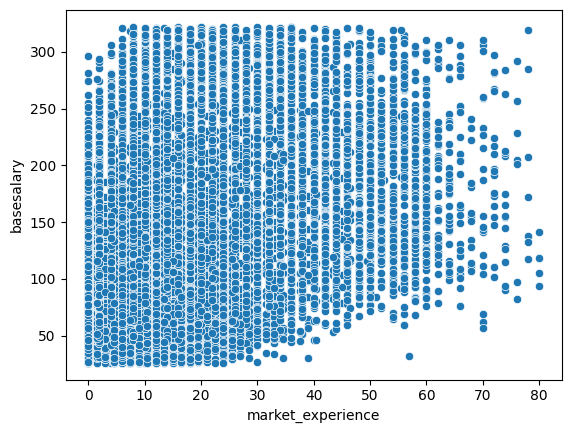

In [881]:
# copy_dev_df['yearsAtCompanyFromCarrier'] = copy_dev_df['yearsatcompany'] / copy_dev_df['yearsofexperience']
def sigmoid(a): 
    return 1.0 / (1.0 + np.exp(-a))

copy_dev_df['market_experience'] = (sigmoid(copy_dev_df['dmaid']) + 1)* copy_dev_df['yearsofexperience']
scatterplot(x = "market_experience", y = "basesalary",data=copy_dev_df)

<h3> Data preprocessing </h3>

In [882]:
numeric_features = ['dmaid','yearsatcompany','yearsofexperience','timestamp']
nominal_features = ['location','company','title','tag']

features = ['location','dmaid','company','title','tag','yearsatcompany','yearsofexperience','timestamp']

In [883]:
class InsertMarketExperience(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["market_experience"] = (sigmoid(X['dmaid']) + 1)* X['yearsofexperience']
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [884]:
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan,strategy="mean")),
        ("marketexperience", InsertMarketExperience()),
        ("scaler", StandardScaler())
    ]), numeric_features),
    ("nom", Pipeline([
        ("binarizer", OneHotEncoder(handle_unknown="ignore"))
        #("imputer", IterativeImputer(missing_values=np.nan, max_iter=5,verbose=2,random_state=2))
    ]), nominal_features)    
], remainder = "passthrough")

<p>I tried here to impute the values of the gender column, but I couldn't figure it out how to do it</p>

In [885]:
# copy_dev_df = pd.concat([copy_dev_df,pd.get_dummies(copy_dev_df['gender'])],axis=1)
# copy_dev_df
# # imp = IterativeImputer(missing_values=np.nan, max_iter=5,verbose=2,random_state=2)
# # imp.fit(copy_dev_df)
# # imp.transform(copy_dev_df)

In [886]:
# pd.get_dummies(copy_dev_df['gender'])

<h3> Prepare for Model selection </h3>

In [887]:
# Separate the features from the target value
dev_X = copy_dev_df[features]
test_X =  test_df[features]

dev_y = copy_dev_df['basesalary'].values
test_y = test_df['basesalary'].values

# Create a splitter that splits the data into training set (60% of the original) and validation set (20% of the original)
splitter = ShuffleSplit(n_splits = 1, train_size = 0.75, random_state = 2) 

In [888]:
# Make a pipeline that contains the preprocessor and the regressor
knn = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",KNeighborsRegressor())
])

# Give the possible values to the hyperparameter n (no. of neighbors)
knn_params = {"predictor__n_neighbors":[1,3,5,6,8,9,13,15],
              "preprocessor__num__marketexperience__insert" : [False]}
# I could not include my feature because it caused an error, so I just left it on false

# Create a GridSearch to find the best value for the hyperparameter using the two sets 
# of data (training and validation) given by the splitter
knn_gs = GridSearchCV(knn,knn_params,scoring = "neg_mean_absolute_error",cv=splitter,refit=True)

# Run the grid search
knn_gs.fit(dev_X,dev_y)

# Display the result
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 15,
  'preprocessor__num__marketexperience__insert': False},
 -41.3513275474124)

In [889]:
ridgeregression = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",Ridge())
])

ridge_params = {
                "preprocessor__num__marketexperience__insert" : [False],
                "predictor__alpha": [0, 45.0, 50.0, 55.0]}

ridge_gs = GridSearchCV(ridgeregression,ridge_params,scoring="neg_mean_absolute_error",cv=splitter,refit=True)

ridge_gs.fit(dev_X,dev_y)

ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 45.0,
  'preprocessor__num__marketexperience__insert': False},
 -40.18215107099123)

<p> A small overfitting can be seen as the training error is less than the validation error</p>

In [890]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  38.47669024704536
Validation error:  41.153760809846


<p> Ridge regression solves the problem </p>

In [891]:
ridgeregression.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridgeregression, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  39.517575452742975
Validation error:  39.91979971054946


<h3> Predicting on the test set: </h3>

In [894]:
mean_absolute_error(test_y, ridge_gs.predict(test_X))

39.62315081393522